# Perspective Transformation 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

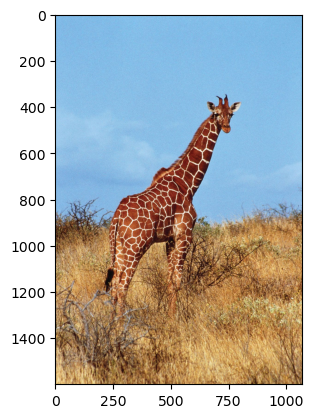

In [2]:
image = cv2.imread("Resources/giraffe-Kenya.jpg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

In [3]:
image_rgb.shape

(1600, 1067, 3)

In [4]:
rows, cols, _ = image_rgb.shape

input_points = np.float32([[50,50], [cols-50, 50], [50, rows-50], [cols-50, rows-50]])

output_points = np.float32([[10,100], [cols-100, 50], [100, rows-10], [cols-50, rows-100]])

'''
Transformation matrix for perspective transformation

3x3

a, b, c
d, e, f
g, h, 1

a,b,c is responsible for horizontal scaling, rotation, and translation
d,e,f is responsible for vertical scaling, rotation, and translation
g,h : Perspective components that account for new depth and skew

'''

M = cv2.getPerspectiveTransform(input_points, output_points)

print(M)

[[ 1.02287821e+00  6.29847356e-02 -4.42634568e+01]
 [-5.02940991e-02  1.04090741e+00  5.07662367e+01]
 [ 3.13145264e-05  2.80659423e-05  1.00000000e+00]]


(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

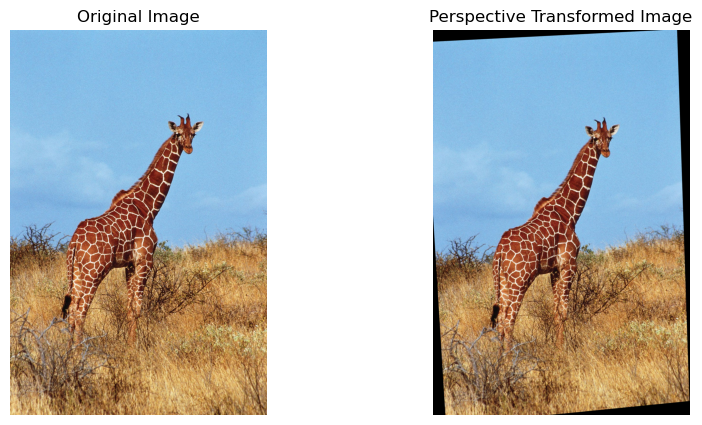

In [5]:
perspective_image = cv2.warpPerspective(image_rgb, M, (cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("Perspective Transformed Image")
plt.axis("off")


# Affine 

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

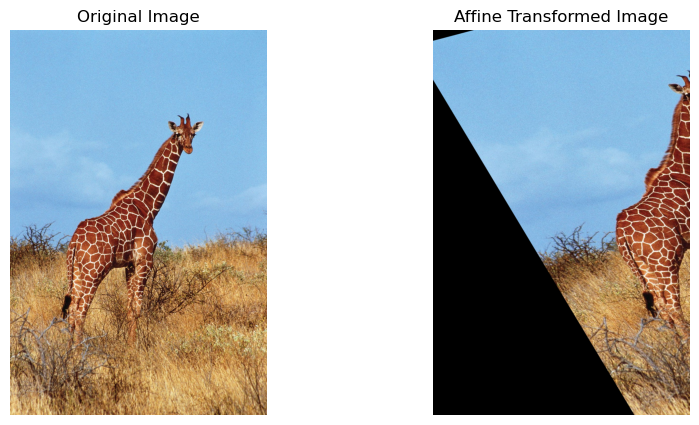

In [6]:
input_points = np.float32([[50,50], [200, 50], [50, 200]])

output_points = np.float32([[10,100], [200, 50], [100, 250]])

M = cv2.getAffineTransform(input_points, output_points)

affine_image = cv2.warpAffine(image_rgb, M, (cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(affine_image)
plt.title("Affine Transformed Image")
plt.axis("off")

# Affine Rotation

(np.float64(-0.5), np.float64(1066.5), np.float64(1599.5), np.float64(-0.5))

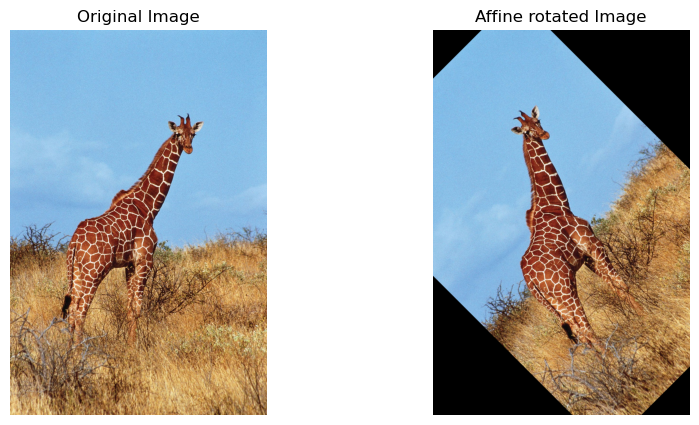

In [7]:
angle = 45
center = (cols // 2, rows // 2)
scale = 1.0

M = cv2.getRotationMatrix2D(center,angle,scale)

rotated_image = cv2.warpAffine(image_rgb, M, (cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(rotated_image)
plt.title("Affine rotated Image")
plt.axis("off")

# Shearing

In [1]:
angle = 45
center = (cols // 2, rows // 2)
scale = 1.0

shear_x, shear_y = 0.5, 0

M = np.float32([[1, shear_x, 0],
                [shear_y, 1, 0]])

sheared_image = cv2.warpAffine(image_rgb, M, (cols*2,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(sheared_image)
plt.title("Sheared Image")
plt.axis("off")

SyntaxError: '[' was never closed (1386349500.py, line 7)

# Translation

In [ ]:
tx, ty = 200, 300

M = np.float32([[1, 0, tx],
                [0, 1, ty]])

translated_image = cv2.warpAffine(image_rgb, M, (cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(translated_image)
plt.title("Translated Image")
plt.axis("off")